In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import SpectralClustering
plt.style.use('seaborn-v0_8')

In [2]:
FONT_SIZE= 12
plt.rcParams.update({
    # 'figure.dpi': 150,
    # 'savefig.dpi': 300,
    # 'savefig.transparent': True,
    # # Font
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'legend.fontsize': FONT_SIZE,
    # line width
    # 'axes.linewidth': LINEWIDTH,
    # 'grid.linewidth': LINEWIDTH,
    # 'lines.linewidth': LINEWIDTH,
    # 'patch.linewidth': LINEWIDTH,
    # 'xtick.major.width': LINEWIDTH,
    # 'xtick.minor.width': LINEWIDTH,
    # 'ytick.major.width': LINEWIDTH,
    # 'ytick.minor.width': LINEWIDTH,
})

In [37]:
def plot_explained_variance(pca):   
 # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    #plt.tight_layout()
    plt.show()

# PCA avec tous les modèles (et peu de composantes)

In [39]:
model_path = "pca_all.pickle"
with open(model_path, 'rb') as f:
        pca = pickle.load(f)

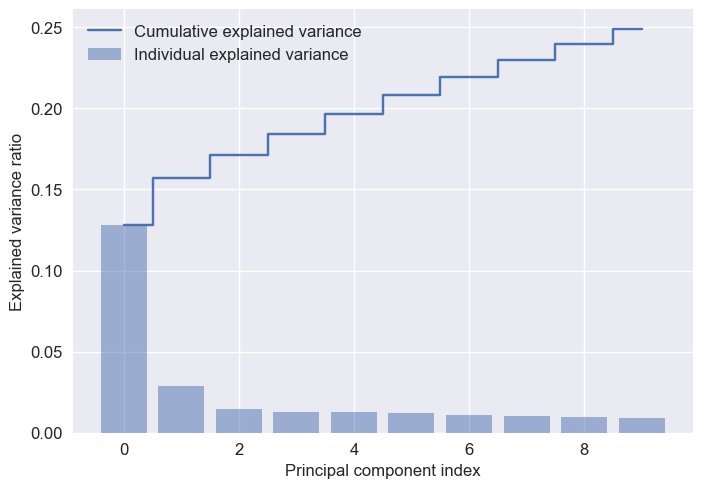

In [40]:
plot_explained_variance(pca)

In [5]:
col = pd.read_csv('data_columns.csv')

In [6]:
loadings = pd.DataFrame(pca.components_.T, columns = ["PC{}".format(i) for i in range(10)])
loadings["model"]=col
loadings['model'] = loadings['model'].str.replace('_\d+', '', regex=True)
loadings['language']=loadings['model'].replace({'CSJ':"JP", 'GPJ':"JP", "BUC":"EN", "WSJ":"EN"})

In [7]:
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,model,language
0,-0.000421,-3.292709e-05,0.001545,-3.976624e-04,0.003124,-0.002420,-0.000209,-0.002387,-0.001416,-0.000215,WSJ,EN
1,-0.000766,1.321803e-03,-0.007718,-1.208101e-03,0.006272,0.002086,-0.004439,-0.005797,0.023487,-0.001016,WSJ,EN
2,-0.000559,-8.856544e-05,-0.000475,7.227626e-05,-0.001829,0.000090,0.000365,0.000430,-0.000700,0.007438,WSJ,EN
3,-0.001012,-1.227126e-04,-0.006505,-1.317506e-03,0.002539,0.000206,-0.005210,0.004460,0.002393,-0.010943,WSJ,EN
4,0.017945,-8.119813e-02,-0.010465,-6.820552e-02,0.018893,0.010558,0.086102,0.009487,0.011291,-0.007705,WSJ,EN
...,...,...,...,...,...,...,...,...,...,...,...,...
6085,-0.000001,-1.662524e-07,-0.000006,-5.629080e-07,-0.000005,0.000002,-0.000002,-0.000002,-0.000005,0.000006,GPJ,JP
6086,-0.000214,-2.385099e-05,-0.000260,-9.623582e-05,0.000237,0.000181,-0.000426,-0.000496,-0.001179,-0.001650,GPJ,JP
6087,-0.002236,-3.987337e-04,-0.006716,3.638379e-05,-0.013405,0.005580,-0.002733,0.000486,-0.005589,-0.010478,GPJ,JP
6088,-0.000046,-1.927576e-06,0.000010,-7.249819e-06,-0.000021,-0.000015,-0.000019,0.000066,-0.000060,-0.000164,GPJ,JP


In [8]:
loadings.value_counts('model')

model
GPJ    1972
WSJ    1734
CSJ    1412
BUC     972
Name: count, dtype: int64

# PCA sur les modèles japonais

In [9]:
model_path = "pca_jp.pickle"
with open(model_path, 'rb') as f:
        pca_jp = pickle.load(f)

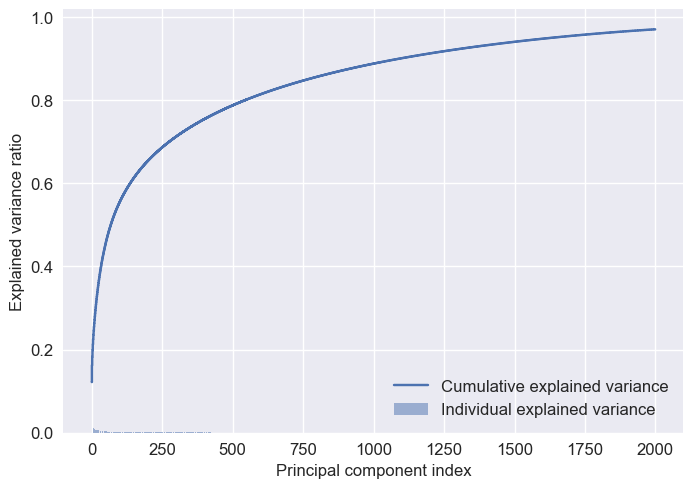

In [11]:
plot_explained_variance(pca_jp)

In [19]:
jp_cols = pd.read_csv('jp_cols.csv')
loadings = pd.DataFrame(pca_jp.components_.T)
loadings["model"]=jp_cols
loadings['model'] = loadings['model'].str.replace('_\d+', '', regex=True)
#loadings['language']=loadings['model'].replace({'CSJ':"JP", 'GPJ':"JP", "BUC":"EN", "WSJ":"EN"})

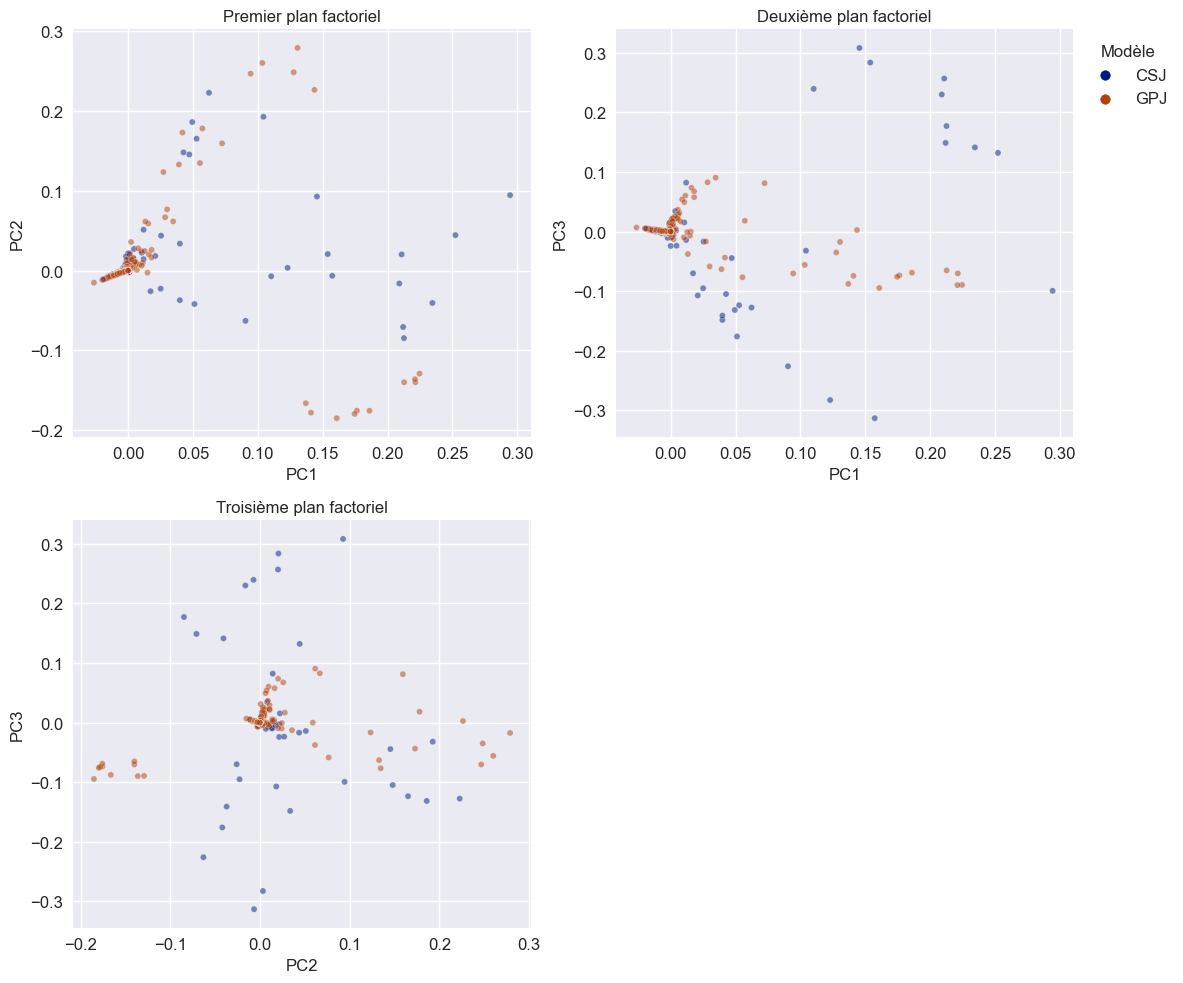

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=loadings, x=0, y=1, alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax1, hue='model')
sns.scatterplot(data=loadings, x=0, y=2,  alpha = 0.5, s=20, palette= 'dark', ax=ax2, hue='model')
sns.scatterplot(data=loadings, x=1, y=2,  alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax3, hue='model')
ax2.legend(bbox_to_anchor=(1,1), loc="upper left", title='Modèle')
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()


Text(0.5, 1.0, 'Covariance matrix')

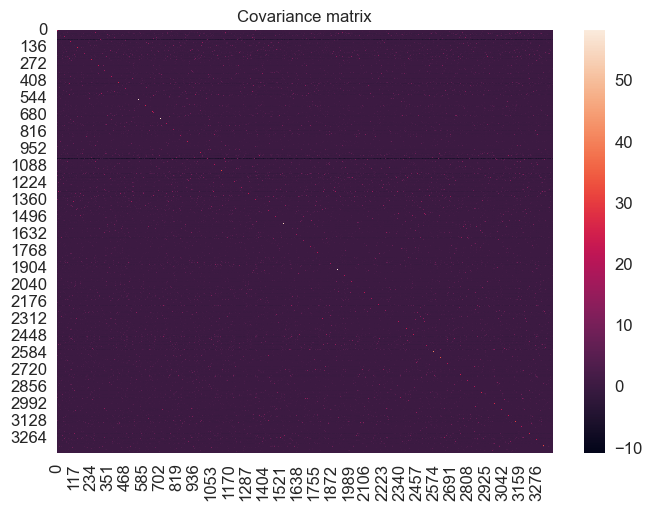

In [24]:
cov_jp = pca_jp.get_covariance()
sns.heatmap(zscore(cov_jp))
plt.title("Covariance matrix")

# PCA sur les modèles anglais

In [25]:
model_path = "pca_en.pickle"
with open(model_path, 'rb') as f:
        pca_en = pickle.load(f)

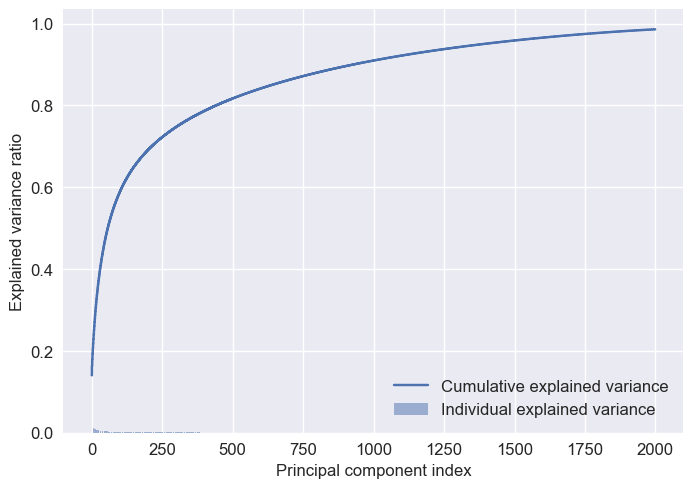

In [26]:
plot_explained_variance(pca_en)

In [27]:
en_cols = pd.read_csv('en_cols.csv')
loadings = pd.DataFrame(pca_en.components_.T)
loadings["model"]=en_cols
loadings['model'] = loadings['model'].str.replace('_\d+', '', regex=True)

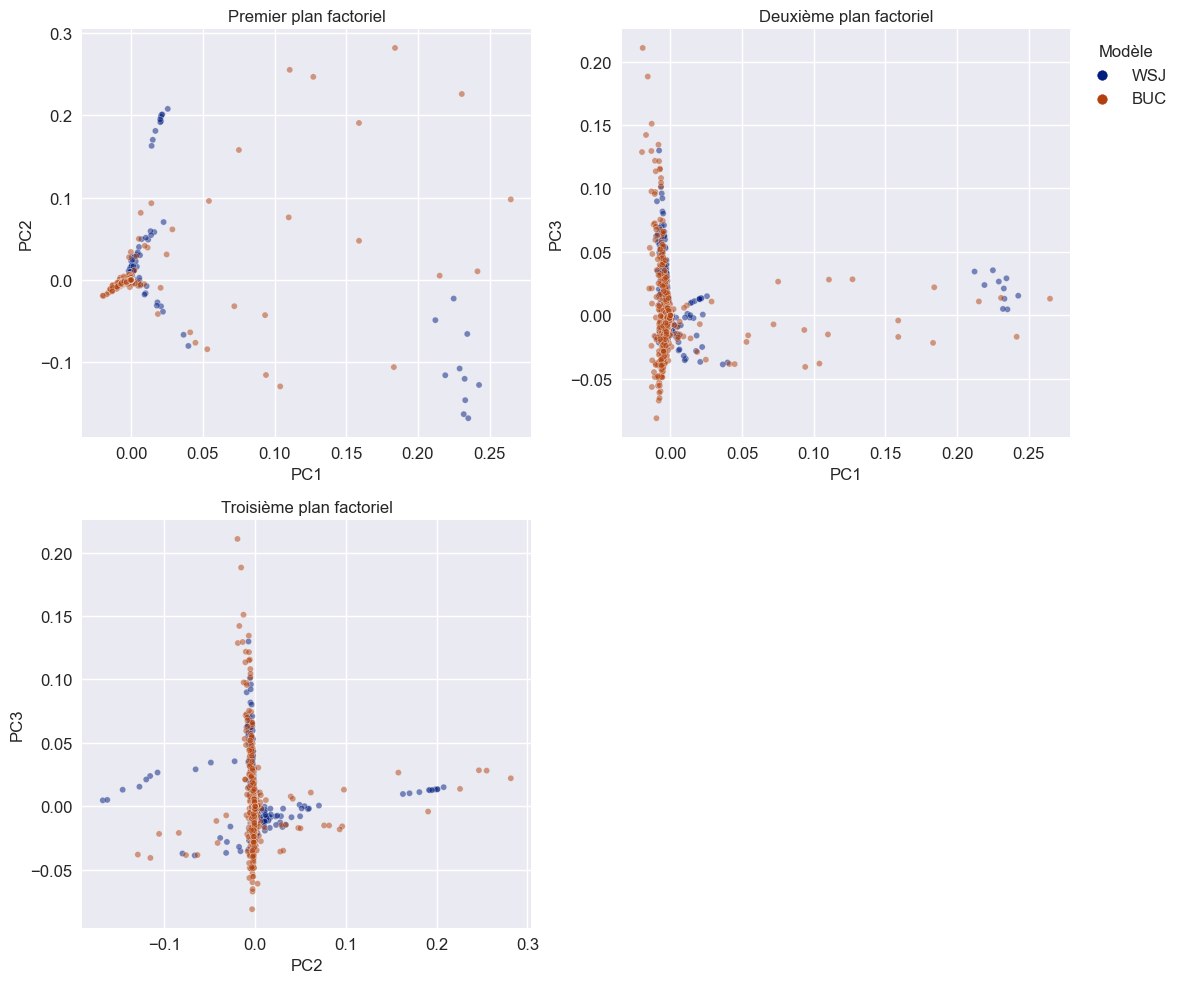

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=loadings, x=0, y=1, alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax1, hue='model')
sns.scatterplot(data=loadings, x=0, y=2,  alpha = 0.5, s=20, palette= 'dark', ax=ax2, hue='model')
sns.scatterplot(data=loadings, x=1, y=2,  alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax3, hue='model')
ax2.legend(bbox_to_anchor=(1,1), loc="upper left", title='Modèle')
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()

Text(0.5, 1.0, 'Covariance matrix')

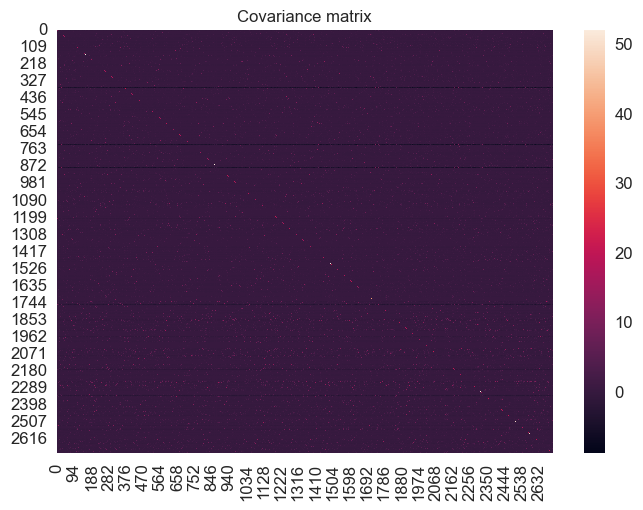

In [29]:
cov_en = pca_en.get_covariance()
sns.heatmap(zscore(cov_en))
plt.title("Covariance matrix")

# PCA avec tous les modèles et avec plus de composantes

In [30]:
model_path = "pca_all_mle.pickle"
with open(model_path, 'rb') as f:
        pca = pickle.load(f)

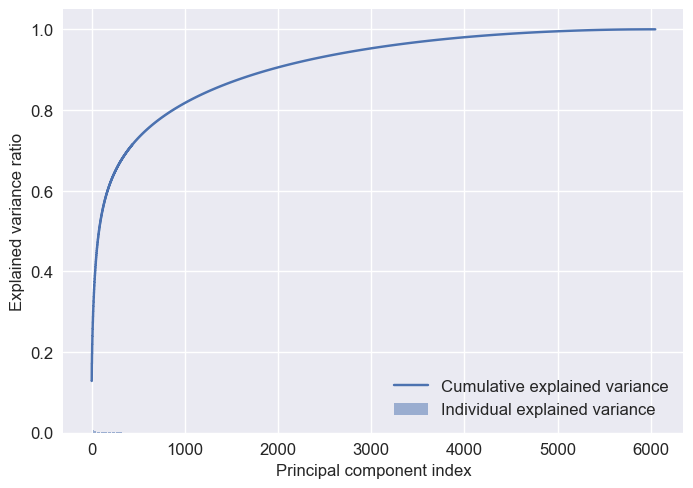

In [31]:
plot_explained_variance(pca)

In [32]:
def select_dimensions(pca):
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    last_component = min([i for i,v in enumerate(cum_sum_eigenvalues) if v >= 0.9])

    return last_component

In [33]:
loadings = pd.DataFrame(pca.components_.T[:, :2000])
col = pd.read_csv('data_columns.csv')
loadings["model"]=col
loadings['model'] = loadings['model'].str.replace('_\d+', '', regex=True)
loadings['language']=loadings['model'].replace({'CSJ':"Japonais", 'GPJ':"Japonais", "BUC":"Anglais", "WSJ":"Anglais"})

In [34]:
loadings.iloc[:, :10].describe()

,0,1,2,3,4,5,6,7,8,9
count,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03,6.090000e+03
mean,5.127262e-19,2.885509e-19,-3.304235e-19,1.139391e-20,-1.823026e-19,1.936965e-19,-6.471743e-19,8.203618e-20,-3.896719e-19,1.959753e-19
std,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02,1.281525e-02
min,-1.831587e-02,-1.876197e-01,-7.784050e-02,-2.492336e-01,-1.076714e-01,-1.005786e-01,-1.344491e-01,-1.109889e-01,-1.076472e-01,-8.336668e-02
25%,-1.855274e-03,-2.840787e-04,-4.296188e-03,-7.698376e-04,-1.706246e-03,-2.499242e-03,-2.530461e-03,-3.378297e-03,-2.672980e-03,-3.980189e-03
50%,-8.895785e-04,-1.061100e-04,-3.531142e-04,-1.031914e-04,1.766586e-05,8.012598e-05,-2.657069e-04,-1.042717e-09,-2.705345e-04,-2.119051e-04
75%,-3.068127e-04,-1.616695e-05,2.355565e-03,3.236137e-04,2.386994e-03,2.460570e-03,6.098765e-04,2.813530e-03,1.760193e-03,2.816230e-03
max,2.053363e-01,1.995012e-01,1.402389e-01,2.697288e-01,1.307527e-01,1.279573e-01,1.949517e-01,1.179883e-01,1.138744e-01,9.337039e-02


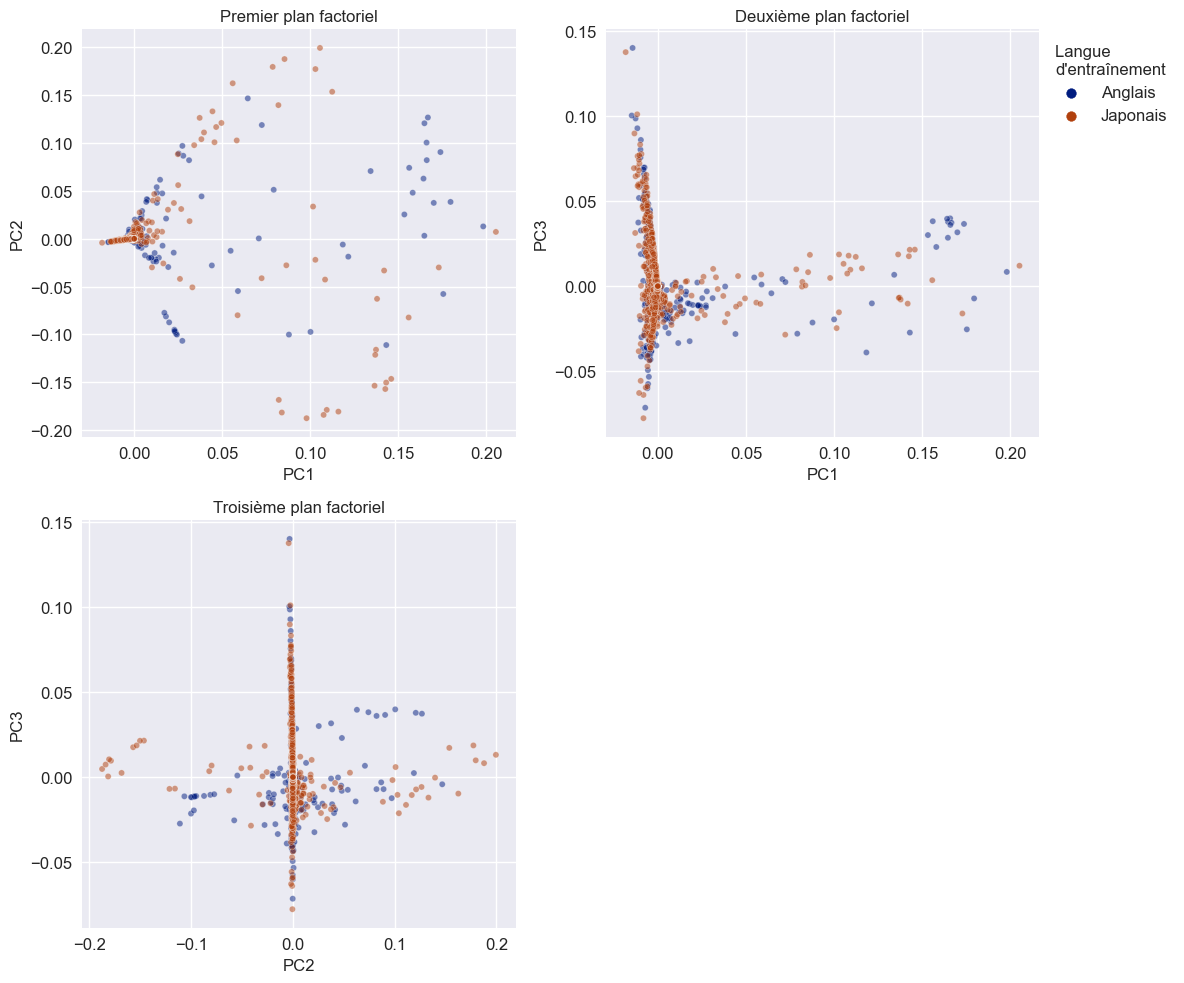

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=loadings, x=0, y=1, hue='language', alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax1)
sns.scatterplot(data=loadings, x=0, y=2, hue='language',  alpha = 0.5, s=20, palette= 'dark', ax=ax2)
sns.scatterplot(data=loadings, x=1, y=2, hue='language',  alpha = 0.5, s=20, palette= 'dark', legend=False, ax=ax3)
ax2.legend(bbox_to_anchor=(1,1), loc="upper left", title='Langue \nd\'entraînement')
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()

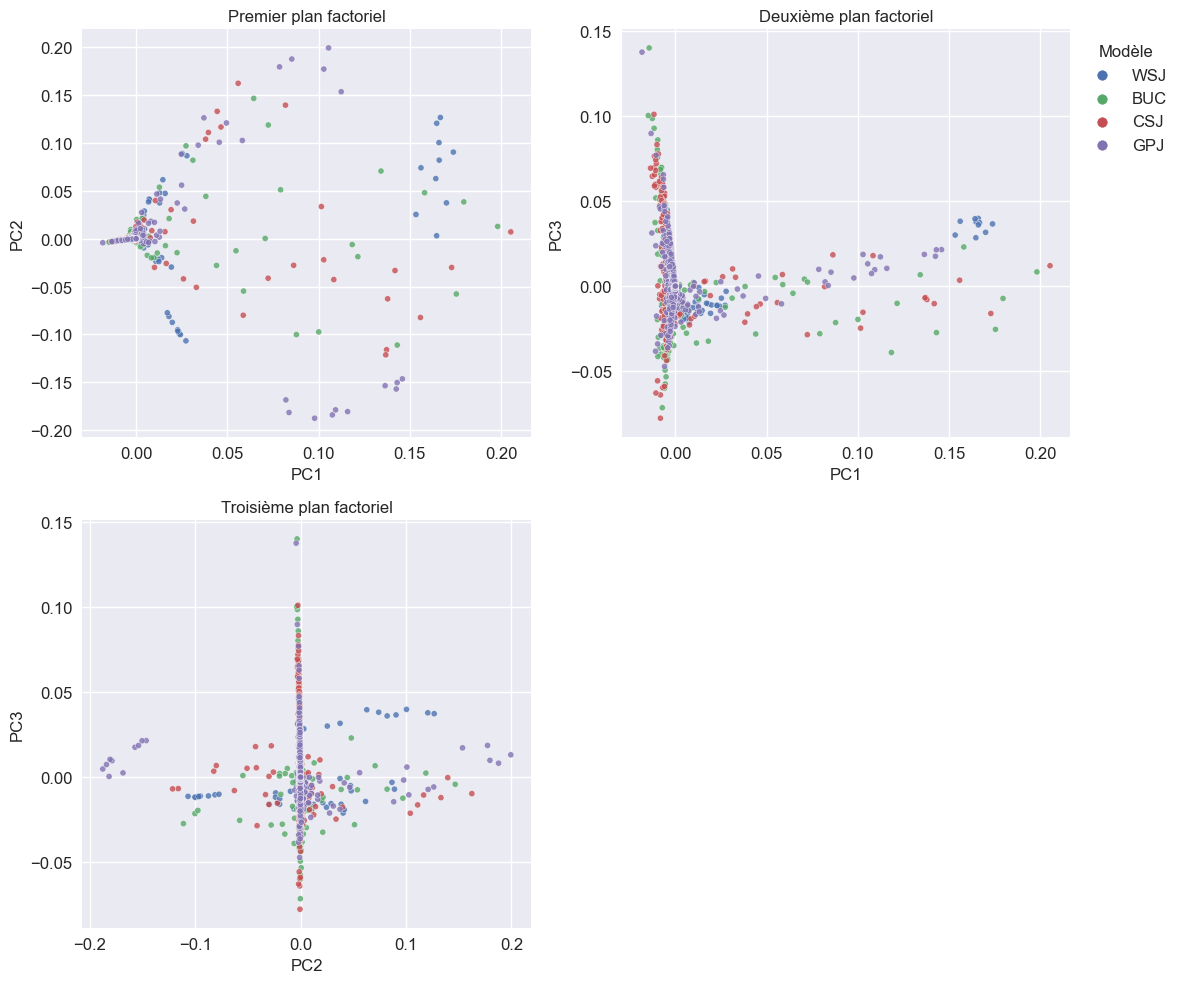

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=loadings, x=0, y=1, hue='model', alpha = 0.8, s=20, legend=False, ax=ax1)
sns.scatterplot(data=loadings, x=0, y=2, hue='model',  alpha = 0.8, s=20, ax=ax2)
sns.scatterplot(data=loadings, x=1, y=2, hue='model',  alpha = 0.8, s=20, legend=False, ax=ax3)
ax2.legend(bbox_to_anchor=(1,1), loc="upper left", title='Modèle')
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()